# VapoRock
* A thermodynamic model for vaporized silicate rocks & melts relevant to magma ocean atmospheres and stellar nebula

In [1]:
import vaporock

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
from thermoengine import model

In [2]:
Fe_wt_ratio = 2*71.85/159.69
Fe_wt_ratio


/Users/aswolf/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8998684952094683

In [3]:
# melt_comp_wts = {'MgO':36.9, 'CaO':3.3, 'Al2O3':4.6, 'SiO2':50.7, 
#                  'Na2O':3e-7, 'K2O':3e-10, 'FeO':3.5}

# SRM 621 glass composition from Hastie1985, reported in Schaefer2004
melt_comp_wts = {'Na2O':12.75, 'K2O':2.02, 'SiO2':71.39, 'CaO':10.75,
                 'Al2O3':2.78, 'MgO':0.27, 'Fe2O3':.04}
# melt_comp_wts = {'Na2O':12.75, 'K2O':2.02, 'SiO2':71.39, 'CaO':10.75,
#                  'Al2O3':2.78, 'MgO':0.27, 'FeO':.04*Fe_wt_ratio}



# Based on NIST SRM reported composition
melt_comp_wts = {'Na2O':12.74, 'K2O':2.01, 'SiO2':71.13, 'CaO':10.71,
                 'Al2O3':2.76, 'MgO':0.27, 'Fe2O3':.04, 'TiO2':.014}

melt_comp_wts_adj = melt_comp_wts.copy()
melt_comp_wts_adj['Na2O']= 20.0
melt_comp_wts_adj['K2O'] = 0.3




In [19]:
for ox in melt_comp_wts:
    print(ox,' : ',melt_comp_wts_adj[ox]/melt_comp_wts[ox])
    
    print('    : ',np.log10(melt_comp_wts_adj[ox]/melt_comp_wts[ox]))

Na2O  :  1.5698587127158556
    :  0.1958605676646496
K2O  :  0.1492537313432836
    :  -0.8260748027008263
SiO2  :  1.0
    :  0.0
CaO  :  1.0
    :  0.0
Al2O3  :  1.0
    :  0.0
MgO  :  1.0
    :  0.0
Fe2O3  :  1.0
    :  0.0
TiO2  :  1.0
    :  0.0


In [4]:
system = vaporock.System(liq_mod='v1.0')
system.set_melt_comp(melt_comp_wts)
system.print_melt_comp()

system_adj = vaporock.System(liq_mod='v1.0')
system_adj.set_melt_comp(melt_comp_wts_adj)
system_adj.print_melt_comp()

MELTS liquid components:


[('SiO2', 0.453127159797986),
 ('TiO2', 0.00010711075817995416),
 ('Al2O3', 0.003502967670988259),
 ('Fe2O3', 0.000153116361988829),
 ('MgCr2O4', 0.0),
 ('Fe2SiO4', 0.0),
 ('MnSi0.5O2', 0.0),
 ('Mg2SiO4', 0.0020475127869152366),
 ('NiSi0.5O2', 0.0),
 ('CoSi0.5O2', 0.0),
 ('CaSiO3', 0.11674315523947151),
 ('Na2SiO3', 0.12565234499909733),
 ('KAlSiO4', 0.026088053286487032),
 ('Ca3(PO4)2', 0.0),
 ('H2O', 0.0)]

MELTS liquid components:


[('SiO2', 0.3806834072461557),
 ('TiO2', 0.00010099958377998078),
 ('Al2O3', 0.013767118629886032),
 ('Fe2O3', 0.00014438035070862956),
 ('MgCr2O4', 0.0),
 ('Fe2SiO4', 0.0),
 ('MnSi0.5O2', 0.0),
 ('Mg2SiO4', 0.0019306925165742102),
 ('NiSi0.5O2', 0.0),
 ('CoSi0.5O2', 0.0),
 ('CaSiO3', 0.11008240711487187),
 ('Na2SiO3', 0.18600201811684347),
 ('KAlSiO4', 0.003671583088158048),
 ('Ca3(PO4)2', 0.0),
 ('H2O', 0.0)]

In [5]:
T = np.linspace(1300,1900,101)
P = 1.0
# buffer = 'IW'
# dlogfO2 = +1.5
# dlogfO2 = 1.5
# g=36.2
# logfO2 = system.redox_buffer(T, P, buffer=buffer)+dlogfO2

/Users/aswolf/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
data = pd.read_excel('data/Schaefer2004-valid-data.xlsx', 
                     sheet_name='gas-abundances')
data['logfO2'] = data['fO2']
data['fO2'] = 10**data['logfO2']
data['K'] = 10**data['K_logP']
data['Na'] = 10**data['Na_logP']

data.head()

/Users/aswolf/opt/anaconda3/lib/python3.8/site-packages/xlrd/xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


T     1e4/T           fO2    K_logP   Na_logP    logfO2             K  \
0  1800  5.554679           NaN -5.147914 -3.994943       NaN  7.113543e-06   
1  1700  5.882751  1.516295e-05 -6.042984 -4.652339 -4.819216  9.057669e-07   
2  1600  6.251409  2.022748e-06 -6.740834 -5.218710 -5.694058  1.816208e-07   
3  1500  6.667418  3.031578e-07 -7.297092 -5.815424 -6.518331  5.045541e-08   
4  1400  7.144307  6.078801e-08 -7.696587 -6.599241 -7.216182  2.011006e-08   

             Na  
0  1.011712e-04  
1  2.226697e-05  
2  6.043514e-06  
3  1.529595e-06  
4  2.516277e-07

In [7]:
mask_O2 = ~np.isnan(data['logfO2'])
mask_K = ~np.isnan(data['K_logP'])
mask_Na = ~np.isnan(data['Na_logP'])


poly_O2 = np.polyfit(data['1e4/T'][mask_O2], data['logfO2'][mask_O2], 2)
invT = 1e4/T
logfO2 = np.polyval(poly_O2, invT)

/Users/aswolf/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


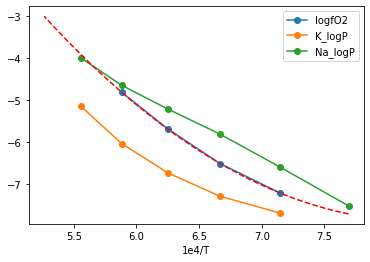

In [8]:
data.plot(x='1e4/T', y=['logfO2','K_logP','Na_logP'], marker='o')
plt.plot(invT, np.polyval(poly_O2, invT),'r--')

In [9]:
logP =  system.eval_gas_abundances(T, logfO2, method='chempot')
logP_adj =  system_adj.eval_gas_abundances(T, logfO2, method='chempot')

/Users/aswolf/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<>:13: DeprecationWarning: invalid escape sequence \;
<>:13: DeprecationWarning: invalid escape sequence \;
<ipython-input-14-6cb66d2fcb0a>:13: DeprecationWarning: invalid escape sequence \;
  plt.xlabel('$10^4\; /\; T$')


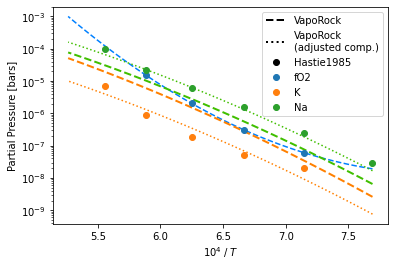

In [14]:





plt.semilogy([], [], 'k--', lw=2, label='VapoRock')
plt.semilogy(invT, 10**np.polyval(poly_O2, invT),'--', color=[0,0.5,1])
plt.semilogy(invT, 10**logP.loc['K(g)'], '--', lw=2, color=[1,.5,0])
plt.semilogy(invT, 10**logP.loc['Na(g)'], '--', lw=2, color=[0.25,.75,0])

plt.semilogy([], [], 'k:', lw=2, label='VapoRock\n(adjusted comp.)')
plt.semilogy(invT, 10**logP_adj.loc['K(g)'], ':', color=[1,.5,0])
plt.semilogy(invT, 10**logP_adj.loc['Na(g)'], ':', color=[0.25,.75,0])

plt.semilogy([], [], 'ko', lw=2, label='Hastie1985')

data.plot(ax=plt.gca(),x='1e4/T', y=['fO2','K','Na'], marker='o', lw=0, logy=True)
plt.xlabel('$10^4\; /\; T$')



plt.ylabel('Partial Pressure [bars]')
plt.legend()

plt.savefig('figs/Hastie1985-comparison.png', dpi=450)
